## 关联规则

### 关联规则-Apriori算法

In [30]:
from __future__ import print_function
import pandas as pd
from apriori import *  # 导入自行编写的apriori函数

inputfile = r'C:\Users\Administrator\alogrithm\python_cases\chapter5\demo\data\menu_orders.xls'
outputfile = r'C:\Users\Administrator\alogrithm\python_cases\chapter5\demo\tmp\apriori_rules1.xls'  # 结果文件
data = pd.read_excel(inputfile, header = None)
data.head()

,0,1,2,3
0,a,c,e,NaN
1,b,d,NaN,NaN
2,b,c,NaN,NaN
3,a,b,c,d
4,a,b,NaN,NaN


#### 方法一

In [44]:
data1=pd.get_dummies(data) #转换成虚拟变量
data1
support = 0.2  # 最小支持度
confidence = 0.5  # 最小置信度
ms = '---'  # 连接符，默认'--'，用来区分不同元素，如A--B。需要保证原始表格中不含有该字符

find_rule(data1, support, confidence, ms).to_excel(outputfile)  # 保存结果


正在进行第1次搜索...
数目：6...

正在进行第2次搜索...
数目：3...

正在进行第3次搜索...
数目：0...

结果为：
           support  confidence
e---a          0.3    1.000000
e---c          0.3    1.000000
c---e---a      0.3    1.000000
a---e---c      0.3    1.000000
c---a          0.5    0.714286
a---c          0.5    0.714286
a---b          0.5    0.714286
c---b          0.5    0.714286
b---a          0.5    0.625000
b---c          0.5    0.625000
a---c---e      0.3    0.600000
b---c---a      0.3    0.600000
a---c---b      0.3    0.600000
a---b---c      0.3    0.600000


<ipython-input-44-aa769fa3789c>:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  find_rule(data1, support, confidence, ms).to_excel(outputfile)  # 保存结果


In [35]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


In [2]:
import pandas as pd
pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

#### 方法二

In [34]:
data.iloc[:,:]

,a,c,e,b,d
0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0
7,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,0.0,1.0,0.0
9,1.0,1.0,1.0,0.0,0.0


In [32]:
data.iloc[:,:].values

array([[1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0.]])

In [31]:
print(u'\n转换原始数据至0-1矩阵...')
ct = lambda x : pd.Series(1, index = x[pd.notnull(x)])  # 转换0-1矩阵的过渡函数
b = map(ct, data.iloc[:,:].values)  # 用map方式执行  as_matrix()需要改为iloc[:,:].values
data = pd.DataFrame(list(b)).fillna(0)  # 实现矩阵转换，空值用0填充
print(u'\n转换完毕。')
data


转换原始数据至0-1矩阵...

转换完毕。


,a,c,e,b,d
0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0
7,1.0,1.0,1.0,1.0,0.0
8,1.0,1.0,0.0,1.0,0.0
9,1.0,1.0,1.0,0.0,0.0


In [ ]:
del b  # 删除中间变量b，节省内存

In [41]:
support = 0.2  # 最小支持度
confidence = 0.5  # 最小置信度
ms = '---'  # 连接符，默认'--'，用来区分不同元素，如A--B。需要保证原始表格中不含有该字符

find_rule(data, support, confidence, ms).to_excel(outputfile)  # 保存结果


正在进行第1次搜索...
数目：6...

正在进行第2次搜索...
数目：3...

正在进行第3次搜索...
数目：0...

结果为：
           support  confidence
e---a          0.3    1.000000
e---c          0.3    1.000000
c---e---a      0.3    1.000000
a---e---c      0.3    1.000000
c---a          0.5    0.714286
a---c          0.5    0.714286
a---b          0.5    0.714286
c---b          0.5    0.714286
b---a          0.5    0.625000
b---c          0.5    0.625000
a---c---e      0.3    0.600000
b---c---a      0.3    0.600000
a---c---b      0.3    0.600000
a---b---c      0.3    0.600000


<ipython-input-41-8a32d56d774d>:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  find_rule(data, support, confidence, ms).to_excel(outputfile)  # 保存结果


## 时序模式

### ARIMA模型

In [47]:
import pandas as pd
# 参数初始化
discfile = r'C:\Users\Administrator\alogrithm\python_cases\chapter5\demo\data\arima_data.xls'
forecastnum = 5

# 读取数据，指定日期列为指标，pandas自动将“日期”列识别为Datetime格式
data = pd.read_excel(discfile, index_col = u'日期')
data.head()

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


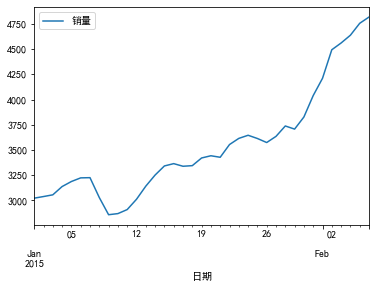

In [48]:
# 时序图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
data.plot()
plt.show()

<ipython-input-49-b8cb9cd6a747>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(data).show()


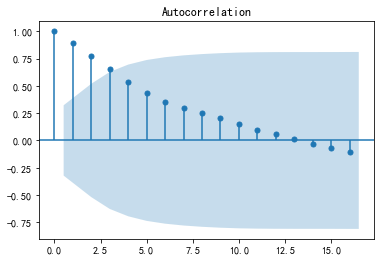

In [49]:
# 自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

In [50]:
# 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data[u'销量']))
# 返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

原始序列的ADF检验结果为： (1.813771015094526, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.4698986602418)


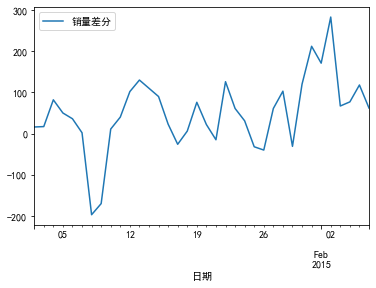

差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)


<ipython-input-51-bcad9024ec51>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()  # 自相关图
<ipython-input-51-bcad9024ec51>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(D_data).show()  # 偏自相关图


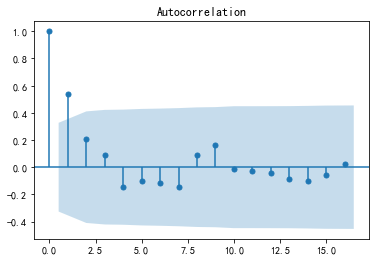

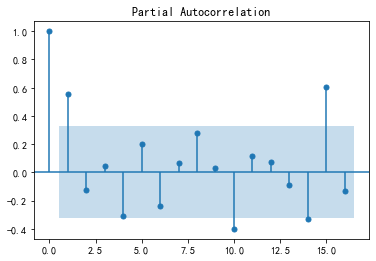

In [51]:
# 差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'销量差分']
D_data.plot()  # 时序图
plt.show()
plot_acf(D_data).show()  # 自相关图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()  # 偏自相关图
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'销量差分']))  # 平稳性检测

In [52]:
# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1))  # 返回统计量和p值

差分序列的白噪声检验结果为： (array([11.30402222]), array([0.00077339]))


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [53]:
from statsmodels.tsa.arima_model import ARIMA

# 定阶
data[u'销量'] = data[u'销量'].astype(float) 
pmax = int(len(D_data)/10)  # 一般阶数不超过length/10
qmax = int(len(D_data)/10)  # 一般阶数不超过length/10
bic_matrix = []  # BIC矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:  # 存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(data, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPREC

[[432.0684724517514,
  422.5100822020519,
  426.08891066687664,
  426.59550741568586],
 [423.6282761484949, 426.0736013199335, None, None],
 [426.7748237902018, None, None, None],
 [430.317524358754, None, None, 436.47810923201035]]

In [54]:
bic_matrix = pd.DataFrame(bic_matrix)  # 从中可以找出最小值
bic_matrix

,0,1,2,3
0,432.068472,422.510082,426.088911,426.595507
1,423.628276,426.073601,NaN,NaN
2,426.774824,NaN,NaN,NaN
3,430.317524,NaN,NaN,436.478109


In [57]:
bic_matrix.stack()

0  0    432.068472
   1    422.510082
   2    426.088911
   3    426.595507
1  0    423.628276
   1    426.073601
2  0    426.774824
3  0    430.317524
   3    436.478109
dtype: float64

In [58]:
p,q = bic_matrix.stack().idxmin()  # 先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 

BIC最小的p值和q值为：0、1


In [59]:
model = ARIMA(data, (p,1,q)).fit()  # 建立ARIMA(0, 1, 1)模型
print('模型报告为：\n', model.summary2())
print('预测未来5天，其预测结果、标准误差、置信区间如下：\n', model.forecast(5))

模型报告为：
                            Results: ARIMA
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.销量             Log-Likelihood:      -205.88   
Date:               2021-05-10 16:20 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
No. Iterations:     14.0000          HQIC:                419.418   
AIC:                417.7595                                        
----------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const         49.9564    20.1390   2.4806   0.0131   10.4847   89.4281
ma.L1.D.销量     0.6710     0.1648   4.0712   0

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

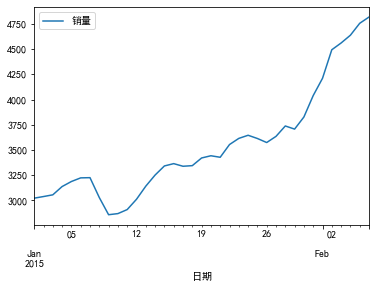

<ipython-input-46-251b23f4449f>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(data).show()


原始序列的ADF检验结果为： (1.813771015094526, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.4698986602418)


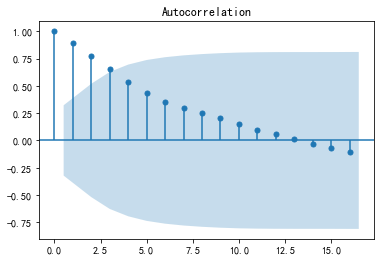

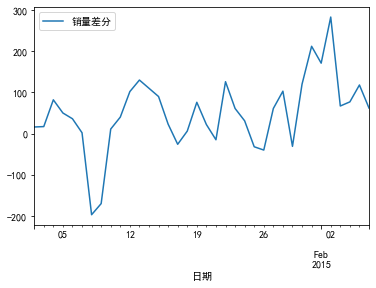

<ipython-input-46-251b23f4449f>:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()  # 自相关图
<ipython-input-46-251b23f4449f>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(D_data).show()  # 偏自相关图
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
betwe

差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)
差分序列的白噪声检验结果为： (array([11.30402222]), array([0.00077339]))


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Administrator\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:470: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
C:\Users\Administrator\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:556: RuntimeWarning: invalid value encountered in double_scalars
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tes

BIC最小的p值和q值为：0、1
模型报告为：
                            Results: ARIMA
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.销量             Log-Likelihood:      -205.88   
Date:               2021-05-10 15:42 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
No. Iterations:     14.0000          HQIC:                419.418   
AIC:                417.7595                                        
----------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const         49.9564    20.1390   2.4806   0.0131   10.4847   89.4281
ma.L1.D.销量     0.6710     0.

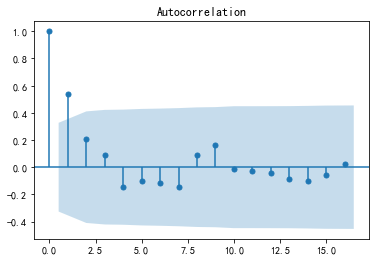

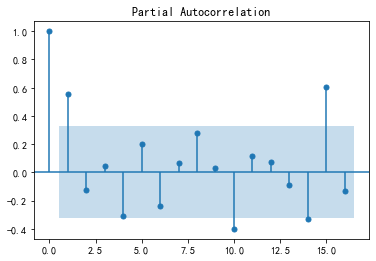

In [46]:
import pandas as pd
# 参数初始化
discfile = r'C:\Users\Administrator\alogrithm\python_cases\chapter5\demo\data\arima_data.xls'
forecastnum = 5

# 读取数据，指定日期列为指标，pandas自动将“日期”列识别为Datetime格式
data = pd.read_excel(discfile, index_col = u'日期')

# 时序图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
data.plot()
plt.show()

# 自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

# 平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data[u'销量']))
# 返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

# 差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'销量差分']
D_data.plot()  # 时序图
plt.show()
plot_acf(D_data).show()  # 自相关图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()  # 偏自相关图
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'销量差分']))  # 平稳性检测

# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1))  # 返回统计量和p值

from statsmodels.tsa.arima_model import ARIMA

# 定阶
data[u'销量'] = data[u'销量'].astype(float) 
pmax = int(len(D_data)/10)  # 一般阶数不超过length/10
qmax = int(len(D_data)/10)  # 一般阶数不超过length/10
bic_matrix = []  # BIC矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:  # 存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(data, (p,1,q)).fit().bic)  #根据ARIMA，差分参数在中间
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix)  # 从中可以找出最小值

p,q = bic_matrix.stack().idxmin()  # 先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
model = ARIMA(data, (p,1,q)).fit()  # 建立ARIMA(0, 1, 1)模型
print('模型报告为：\n', model.summary2())
print('预测未来5天，其预测结果、标准误差、置信区间如下：\n', model.forecast(5))


<IMG src="file:///C:\Users\Administrator\AppData\Roaming\feiq\RichOle\1556139901.bmp">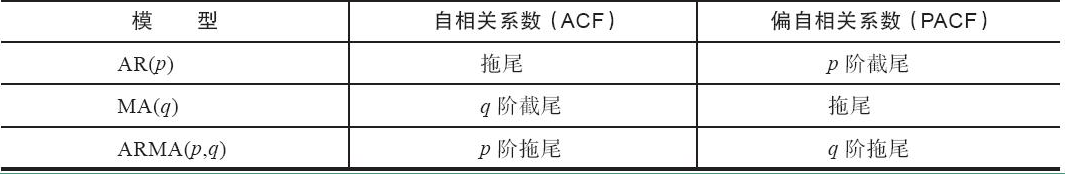

<IMG src="file:///C:\Users\Administrator\AppData\Roaming\feiq\RichOle\3056605041.bmp">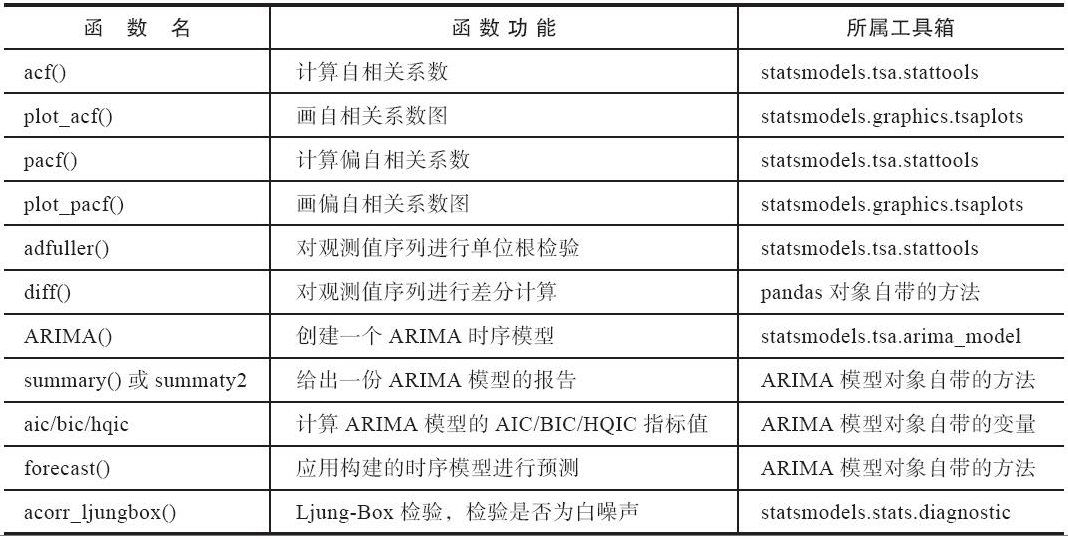

在一般的情况下，AIC可以表示为： AIC=2k-2ln(L)

其中：k是参数的数量，L是似然函数。

BIC准则（BIC criterion）又称贝叶斯信息准则，与AIC准则（赤池信息准则）类似，用于模型的选择。很多参数估计问题均采用似然函数作为目标函数，当训练数据足够多时，可以不断提高模型精度，但是以提高模型复杂度为代价的，同时带来一个机器学习中非常普遍的问题——过拟合。 所以，模型选择问题在模型复杂度与模型对数据集描述能力（即似然函数）之间寻求最佳平衡。

BIC=kln(n)-2ln(L), 其中k为模型参数个数，n为样本数量，L为似然函数。训练模型时，增加参数数量，也就是增加模型复杂度，会增大似然函数，但是也会导致过拟合现象。kln(n)惩罚项在样本数量较多的情况下可有效防止模型精度过高造成模型复杂度过高的问题，避免维度灾难现象。